# **Glass Prediction using Machine Learning**
### **By Gayathri Devi Nagalapuram**

#### Linkedin: https://www.linkedin.com/in/gayathri1462/

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
# load data from glass.data file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
# assign column names using the glass.names file
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass']
# use pandas to read the dataset
df = pd.read_csv(url,names=names)
# display the top 5 rows of dataset
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Attribute Information:**
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
   10. Fe: Iron
   11. Type of glass: (class attribute)
     1. building_windows_float_processed
     2. building_windows_non_float_processed
     3. vehicle_windows_float_processed
     4. vehicle_windows_non_float_processed (none in this database)
     5. containers
     6. tableware
     7. headlamps

In [ ]:
# Shape of the Dataset
df.shape

(214, 11)

* Number of Instances: 214
* Number of Attributes: 11 

In [ ]:
# Columns in the dataset
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')

In [ ]:
# datatypes of the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


All attributes are continuously valued



In [ ]:
# check for missing values (this dataset has no missing values)
df.isna().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

Missing Attribute Values: None

In [ ]:
# Drop unwanted columns
df.drop(['Id'],axis=1,inplace = True)

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# statistics of attributes
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


* By comparing the Mean and Standard deviation (Std) values of each column, we can observer that the Std values of the **" Type_of_glass, Fe, Ba, K "** columns are too large compared to the Mean values. This can affect the performance of the models. 
* So, we can eliminate some columns other than the target column looking at the performance of our models.

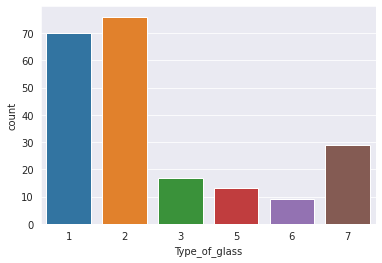

In [ ]:
# Visualization of different types of glass and their count
sns.countplot(x= df['Type_of_glass'])
plt.show()


* The target class has more than 2 values. Therefore, This is a Multiclass classification problem.
* We can notice that type 4 does not exist in this dataset. 
* This is an Imbalanced dataset.



In [ ]:
# Displays different types of glass and their count
df['Type_of_glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

Class Distribution: (out of 214 total instances)
* 163 Window glass (building windows and vehicle windows)
  * 87 float processed  
    * 70 building windows (Type 1)
    * 17 vehicle windows (Type 3)
  * 76 non-float processed
    * 76 building windows (Type 2)
    * 0 vehicle windows (Type 4)
  * 51 Non-window glass
    * 13 containers (Type 5)
    * 9 tableware (Type 6)
    * 29 headlamps (Type 7)

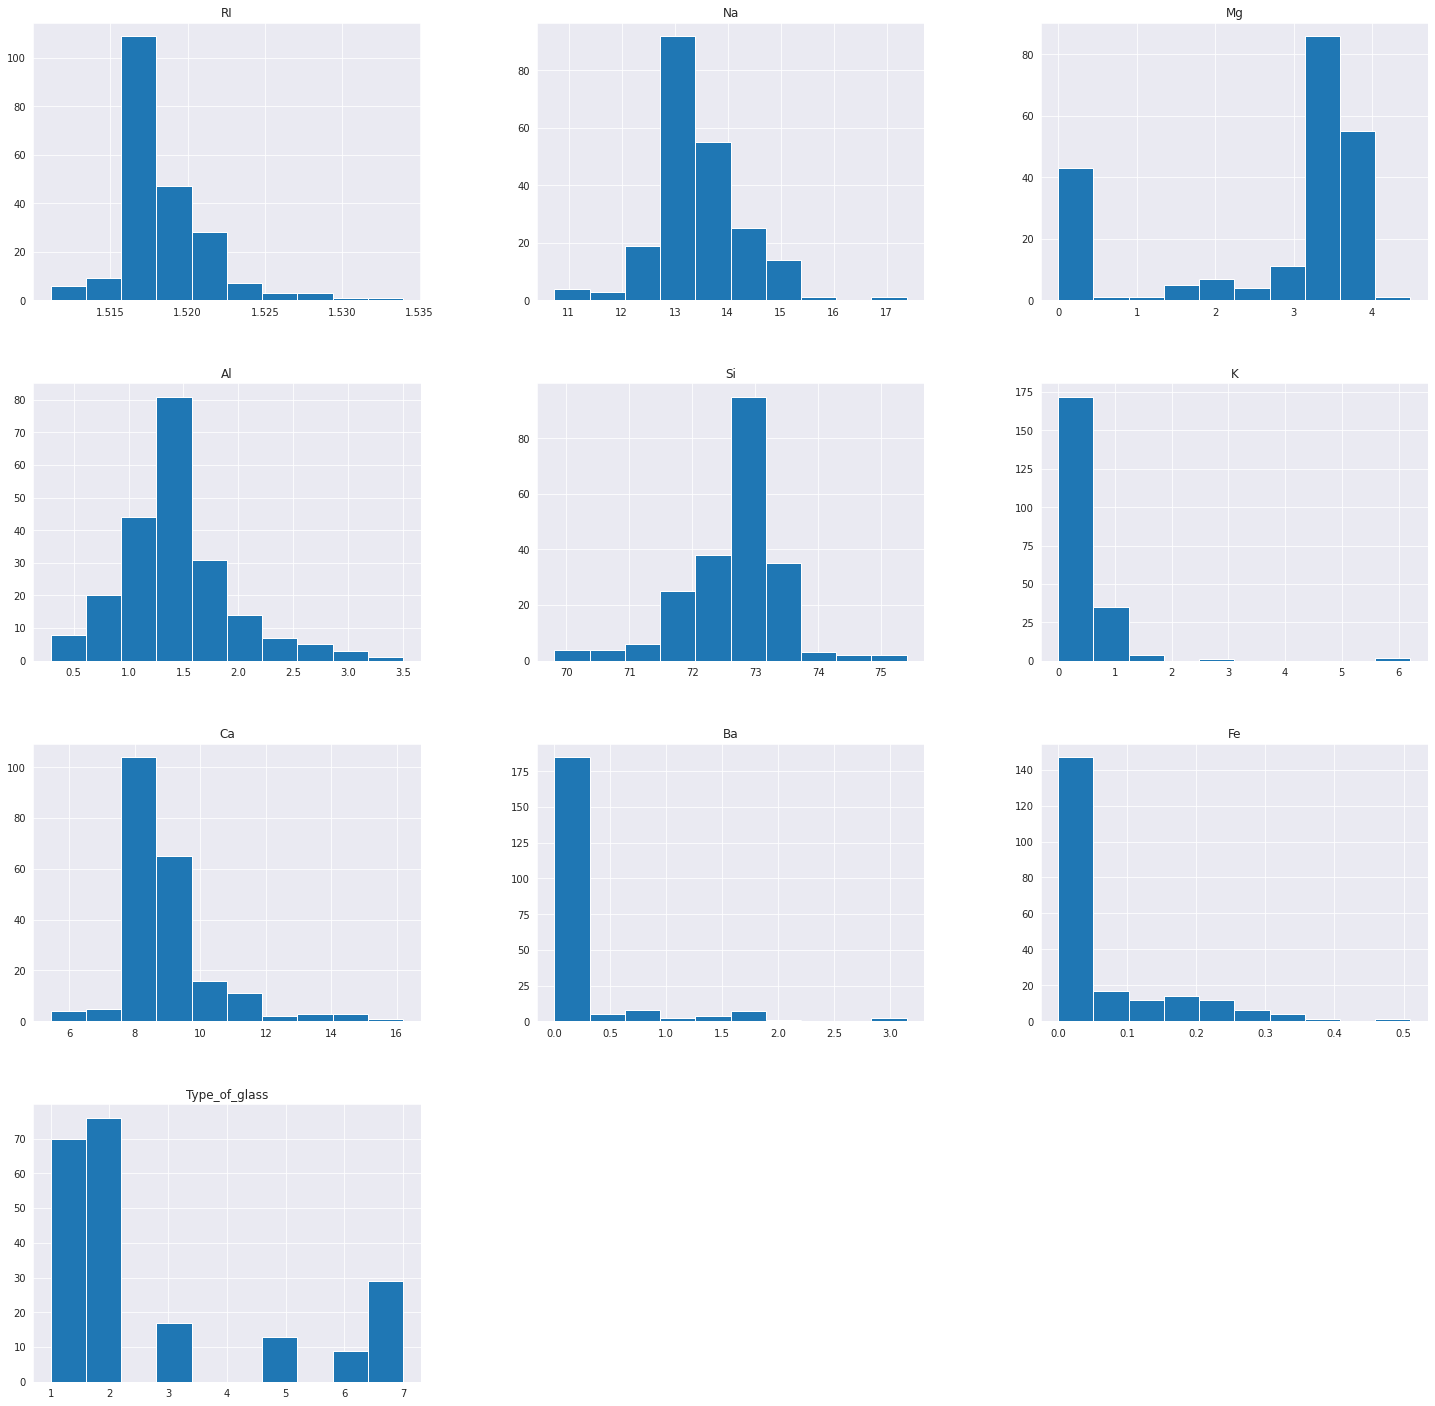

In [ ]:
# Histograms for each variable
df.hist(figsize=(25,25))
plt.show()

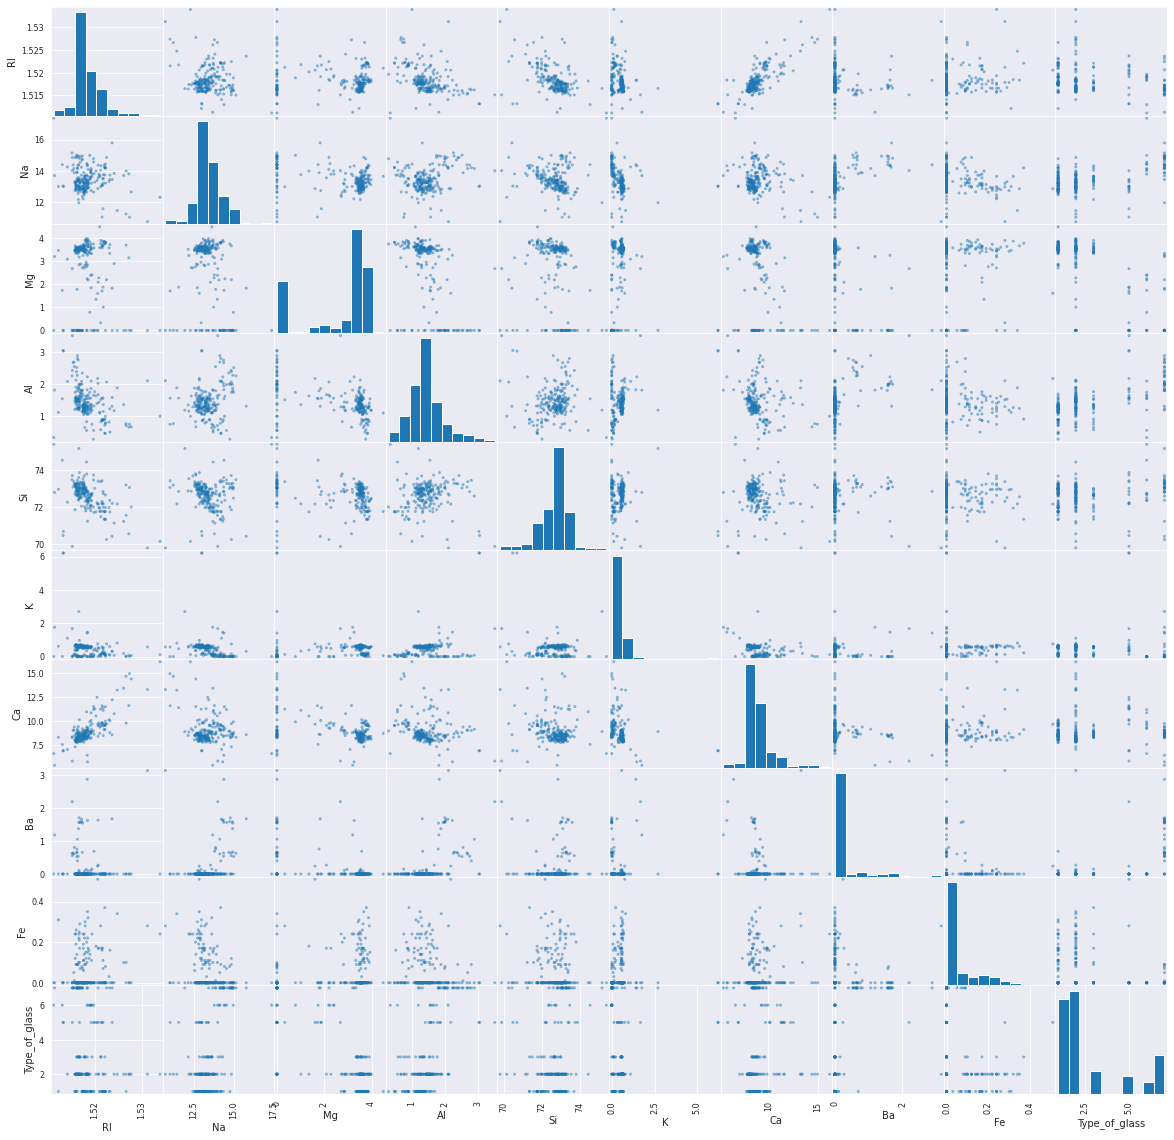

In [ ]:
# Create scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20,20))
plt.show()

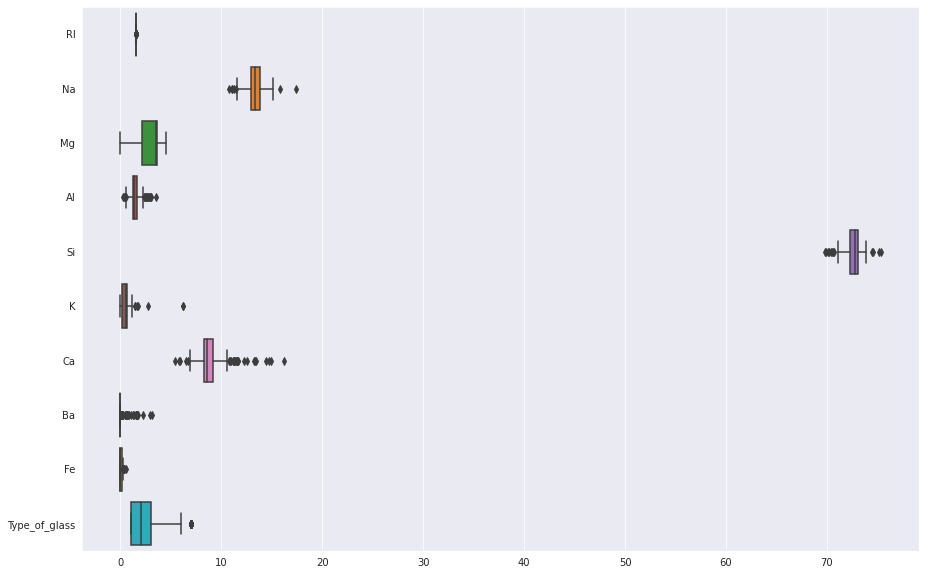

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,orient='h')
plt.show()

In [ ]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type_of_glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


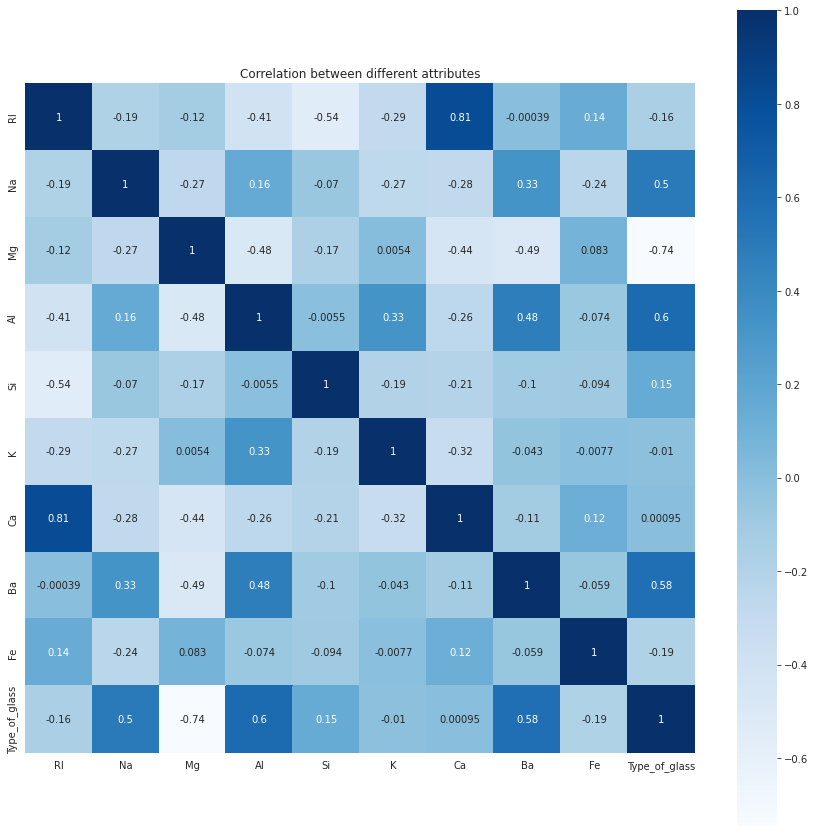

In [ ]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

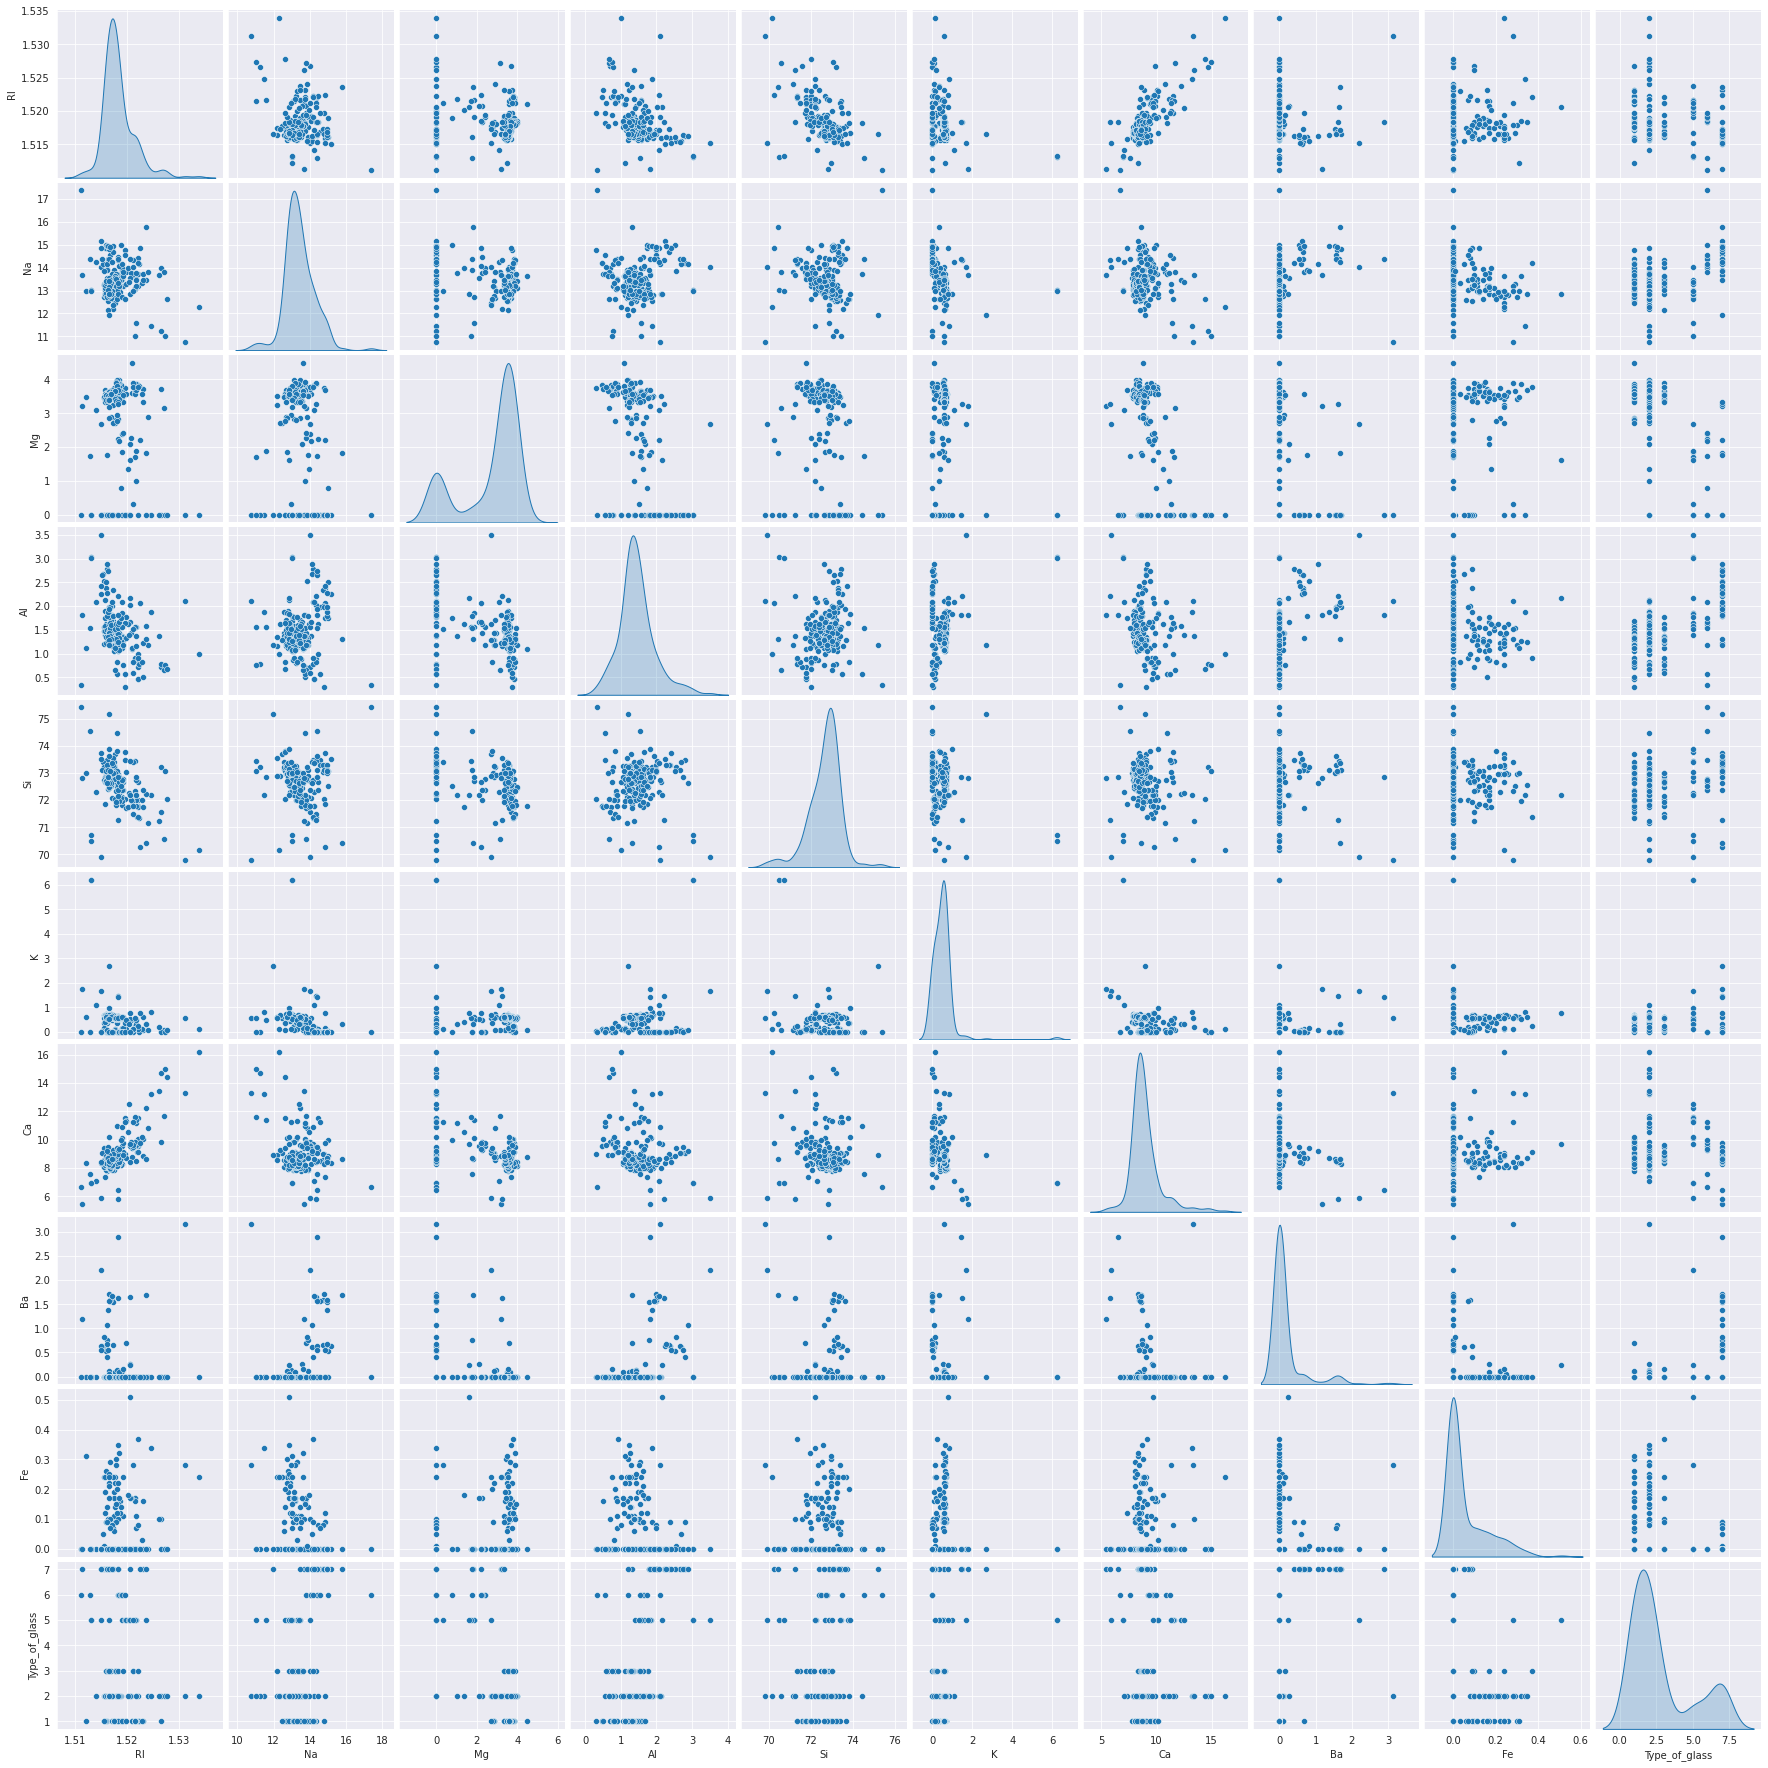

In [ ]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Type_of_glass"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

RI               0.164237
Na               0.502898
Mg               0.744993
Al               0.598829
Si               0.151565
K                0.010054
Ca               0.000952
Ba               0.575161
Fe               0.188278
Type_of_glass    1.000000
Name: Type_of_glass, dtype: float64

In [ ]:
#Split the data into predictor variables and target variable
y = df['Type_of_glass']
x = df.drop('Type_of_glass', axis=1)

In [ ]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type_of_glass, dtype: int64

In [ ]:
print(x.shape)
print(y.shape)

(214, 9)
(214,)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=24)
x,y = sm.fit_resample(x, y)

In [ ]:
print(x.shape)
print(y.shape)

(456, 9)
(456,)


In [ ]:
# Split the dataset into train and test sets. 
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=18)

### KNN - K Nearest Neighbors


Train Set Accuracy:100.0
Test Set Accuracy:82.45614035087719

Confusion Matrix



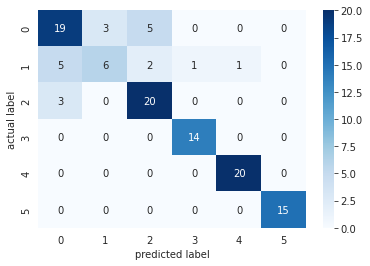


Classification report

              precision    recall  f1-score   support

           1       0.70      0.70      0.70        27
           2       0.67      0.40      0.50        15
           3       0.74      0.87      0.80        23
           5       0.93      1.00      0.97        14
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        15

    accuracy                           0.82       114
   macro avg       0.83      0.83      0.82       114
weighted avg       0.82      0.82      0.82       114



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric = 'minkowski')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

knn_acc= accuracy_score(y_test,y_pred)

print("\nTrain Set Accuracy:"+str(accuracy_score(y_train,knn.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,knn.predict(x_test))*100))

print("\nConfusion Matrix\n")
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn, annot=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

print("\nClassification report\n")
print(classification_report(y_test,y_pred))

### SVC - Support Vector Classifier


Train Set Accuracy:80.11695906432749
Test Set Accuracy:71.9298245614035

Confusion Matrix



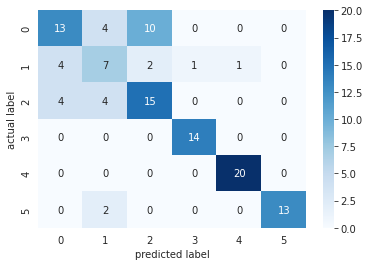


Classification report

              precision    recall  f1-score   support

           1       0.62      0.48      0.54        27
           2       0.41      0.47      0.44        15
           3       0.56      0.65      0.60        23
           5       0.93      1.00      0.97        14
           6       0.95      1.00      0.98        20
           7       1.00      0.87      0.93        15

    accuracy                           0.72       114
   macro avg       0.75      0.74      0.74       114
weighted avg       0.73      0.72      0.72       114



In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', probability=True)
svc.fit(x_train,y_train)

y_pred = svc.predict(x_test)

svc_acc= accuracy_score(y_test,y_pred)

print("\nTrain Set Accuracy:"+str(accuracy_score(y_train,svc.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,svc.predict(x_test))*100))

print("\nConfusion Matrix\n")
cm_svc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_svc, annot=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

print("\nClassification report\n")
print(classification_report(y_test,y_pred,zero_division=1))

### Naive Bayes


Train Set Accuracy:63.1578947368421
Test Set Accuracy:54.385964912280706

Confusion Matrix



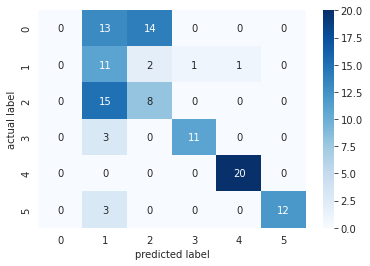


Classification report

              precision    recall  f1-score   support

           1       1.00      0.00      0.00        27
           2       0.24      0.73      0.37        15
           3       0.33      0.35      0.34        23
           5       0.92      0.79      0.85        14
           6       0.95      1.00      0.98        20
           7       1.00      0.80      0.89        15

    accuracy                           0.54       114
   macro avg       0.74      0.61      0.57       114
weighted avg       0.75      0.54      0.51       114



In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train,y_train)

y_pred = mnb.predict(x_test)

mnb_acc= accuracy_score(y_test,y_pred)

print("\nTrain Set Accuracy:"+str(accuracy_score(y_train,mnb.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,mnb.predict(x_test))*100))

print("\nConfusion Matrix\n")
cm_nb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_nb, annot=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

print("\nClassification report\n")
print(classification_report(y_test,y_pred,zero_division=1))

### Decision Tree


Train Set Accuracy:100.0
Test Set Accuracy:78.0701754385965

Confusion Matrix



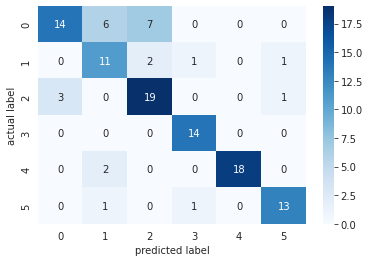


Classification report

              precision    recall  f1-score   support

           1       0.82      0.52      0.64        27
           2       0.55      0.73      0.63        15
           3       0.68      0.83      0.75        23
           5       0.88      1.00      0.93        14
           6       1.00      0.90      0.95        20
           7       0.87      0.87      0.87        15

    accuracy                           0.78       114
   macro avg       0.80      0.81      0.79       114
weighted avg       0.80      0.78      0.78       114



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

dtc_acc= accuracy_score(y_test,y_pred)

print("\nTrain Set Accuracy:"+str(accuracy_score(y_train,dtc.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,dtc.predict(x_test))*100))

print("\nConfusion Matrix\n")

cm_dtc = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dtc, annot=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

print("\nClassification report\n")
print(classification_report(y_test,y_pred,zero_division=1))

### Random Forest


Train Set Accuracy:100.0
Test Set Accuracy:89.47368421052632

Confusion Matrix



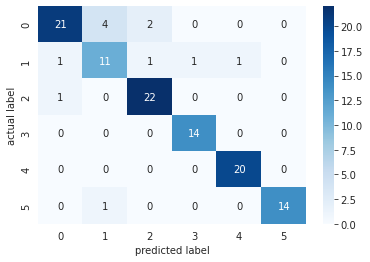


Classification report

              precision    recall  f1-score   support

           1       0.91      0.78      0.84        27
           2       0.69      0.73      0.71        15
           3       0.88      0.96      0.92        23
           5       0.93      1.00      0.97        14
           6       0.95      1.00      0.98        20
           7       1.00      0.93      0.97        15

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.90      0.89      0.89       114



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 250, criterion = 'entropy')
rfc.fit(x_train,y_train)

y_pred = rfc.predict(x_test)

rfc_acc= accuracy_score(y_test,y_pred)

print("\nTrain Set Accuracy:"+str(accuracy_score(y_train,rfc.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,rfc.predict(x_test))*100))

print("\nConfusion Matrix\n")

cm_rf = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rf, annot=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

print("\nClassification report\n")
print(classification_report(y_test,y_pred,zero_division=1))

### Gradient Boosting


Train Set Accuracy:100.0
Test Set Accuracy:88.59649122807018

Confusion Matrix



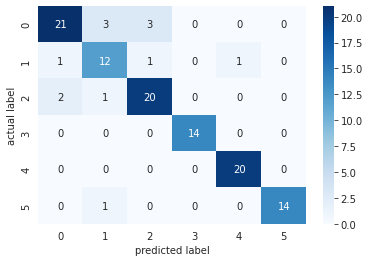


Classification report

              precision    recall  f1-score   support

           1       0.88      0.78      0.82        27
           2       0.71      0.80      0.75        15
           3       0.83      0.87      0.85        23
           5       1.00      1.00      1.00        14
           6       0.95      1.00      0.98        20
           7       1.00      0.93      0.97        15

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.89      0.89      0.89       114



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

y_pred = gbc.predict(x_test)

gbc_acc= accuracy_score(y_test,y_pred)

print("\nTrain Set Accuracy:"+str(accuracy_score(y_train,gbc.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,gbc.predict(x_test))*100))

print("\nConfusion Matrix\n")

cm_rf = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rf, annot=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

print("\nClassification report\n")
print(classification_report(y_test,y_pred,zero_division=1))


Train Set Accuracy:98.83040935672514
Test Set Accuracy:88.59649122807018

Confusion Matrix



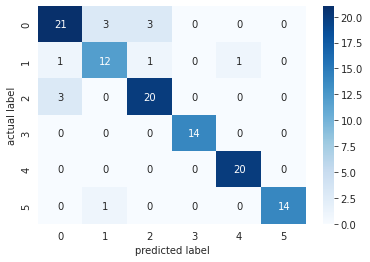


Classification report

              precision    recall  f1-score   support

           1       0.84      0.78      0.81        27
           2       0.75      0.80      0.77        15
           3       0.83      0.87      0.85        23
           5       1.00      1.00      1.00        14
           6       0.95      1.00      0.98        20
           7       1.00      0.93      0.97        15

    accuracy                           0.89       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.89      0.89      0.89       114



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth=6,n_estimators = 10)
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)

xgb_acc= accuracy_score(y_test,y_pred)

print("\nTrain Set Accuracy:"+str(accuracy_score(y_train,xgb.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,xgb.predict(x_test))*100))

print("\nConfusion Matrix\n")
cm_rf = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rf, annot=True,cmap='Blues')
plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

print("\nClassification report\n")
print(classification_report(y_test,y_pred,zero_division=1))


In [ ]:
models = pd.DataFrame({
    'Model': ['K Nearest Neighbour', 'Support Vector Classifier', 'Naive Bayes','Decision Tree Classifier',
             'Random Forest Classifier', 'Gradient Boosting Classifier',  'XgBoost'],
    'Score': [knn_acc, svc_acc, mnb_acc, dtc_acc, rfc_acc, gbc_acc, xgb_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,0.894737
5,Gradient Boosting Classifier,0.885965
6,XgBoost,0.885965
0,K Nearest Neighbour,0.824561
3,Decision Tree Classifier,0.780702
1,Support Vector Classifier,0.719298
2,Naive Bayes,0.543860


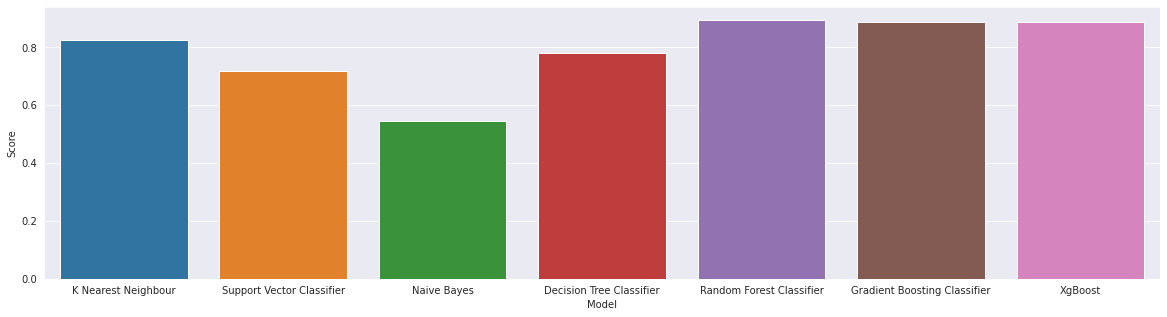

In [ ]:
# Visualization of different types of glass and their count
plt.figure(figsize=(20,5))
sns.barplot(x = models['Model'], y = models['Score'])
plt.show()

### Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rfc, x, y, cv=5))

[0.85869565 0.87912088 0.83516484 0.85714286 0.94505495]


In [ ]:
# mean of accuracies
accuracies = cross_val_score(rfc, x_train, y_train, cv = 5)
print(f'Accuracy (mean):{accuracies.mean()*100}')
print('std: %',accuracies.std()*100)

Accuracy (mean):88.61040068201194
std: % 3.3377510555049636


In [ ]:
# inference from cross_val_score
print(f'Accuracy (mean):{accuracies.mean()*100:}')
print(f'std: % {accuracies.std()*100:.2f}')

Accuracy (mean):88.61040068201194
std: % 3.34


Therefore, Random Forest Classifier is the best model as there is no overfitting.

In [ ]:
df = pd.DataFrame({
    'Actual' : rfc.predict(x_test),
    'Predicted' : y_test
})
comparison_column = np.where(df["Actual"] == df["Predicted"], True, False)
df["equal"] = comparison_column
df.head()

,Actual,Predicted,equal
74,2,2,True
376,6,6,True
318,5,5,True
438,7,7,True
212,7,7,True


In [ ]:
df["equal"].value_counts()

True     102
False     12
Name: equal, dtype: int64

This shows that the Random Forest Classifier model is predicting the type of class accurately as we have very less false values.